In [5]:
%matplotlib inline

from pymoc import MOC
import healpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pymoc

In [6]:
ukidds = MOC(filename='/home/calum/Documents/Mphys_data/calibration/las-DR10-lores.fits')
sdss = MOC(filename='/home/calum/Documents/Mphys_data/calibration/sdssDR9-hires.fits')
wise = MOC(filename='/home/calum/Documents/Mphys_data/calibration/wise-coverage.fits')
galex = MOC(filename='/home/calum/Documents/Mphys_data/calibration/MOC-J_ApJS_173_185_galex-512 (1).fits')

In [11]:
ukidds.area_sq_deg, sdss.area_sq_deg, wise.area_sq_deg, galex.area_sq_deg

(3955.381126468927, 14806.998805809493, 41218.57971638284, 12.93036772153454)

In [22]:
intersect_ukidds_sdss = ukidds.intersection(sdss)

In [23]:
intersect_ukidds_sdss.area_sq_deg

3897.8468913915403

In [24]:
intersect_ukidds_sdss_wise = intersect_ukidds_sdss.intersection(wise)

In [25]:
intersect_ukidds_sdss_wise.area_sq_deg

3897.7846000663108

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


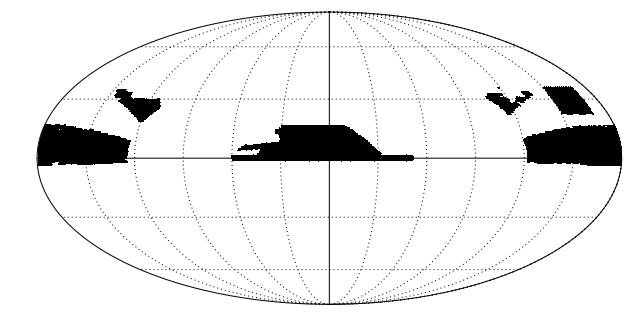

In [26]:
plot_moc(intersect_ukidds_sdss_wise, projection='moll',color='black')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


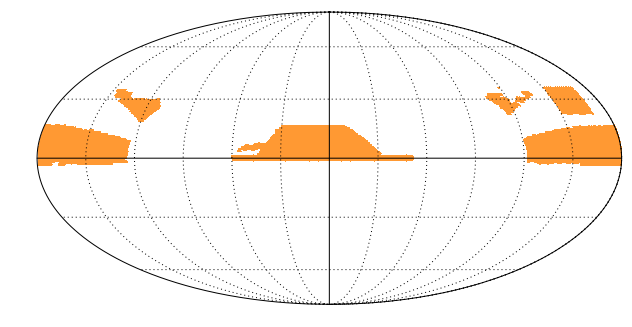

In [19]:
plot_moc(ukidds, projection='moll',color='yellow')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


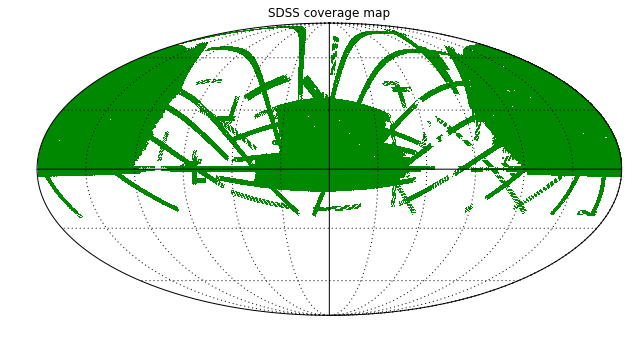

In [17]:
plot_moc(sdss, projection='moll', color='green', title='SDSS coverage map', coord_sys='C')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


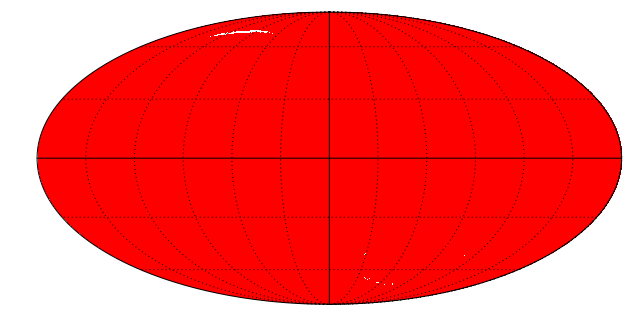

In [18]:
plot_moc(wise, projection='moll', color='red')
plt.savefig('wise_covmap.png')

In [10]:

def plot_moc(moc, order=None, antialias=0, filename=None,
             projection='moll', color='blue', title='', coord_sys='C',
             graticule=True, **kwargs):
    """Plot a MOC using Healpy.
    This generates a plot of the MOC at the specified order, or the MOC's
    current order if this is not specified.  The MOC is flattened at an order
    of `order + antialias` to generate intermediate color levels.
    :param order: HEALPix order at which to generate the plot.
    :param antialias: number of additional HEALPix orders to use for
        intermediate color levels.  (There can be `4 ** antialias` levels.)
    :param filename: file in which to save plot.  If not specified then
        the plot is shown with `plt.show()`.
    :param projection: map projection to be used --- can be shortened to
        4 characters.  One of:
            * `'cart[esian]'` (uses `healpy.visufunc.cartview`)
            * `'moll[weide]'` (uses `healpy.visufunc.mollview`)
            * `'gnom[onic]'` (uses `healpy.visufunc.gnomview`)
    :param color: color scheme.
        One of:
            * `'blue'`
            * `'green'`
            * `'red'`
            * `'black'`
    :param title: title of the plot.
    :param coord_sys: Healpy coordinate system code for the desired plot
        coordinates.  One of:
            * `'C'` --- Celestial (equatorial)
            * `'G'` --- Galactic
            * `'E'` --- Ecliptic
    :param graticule: whether or not to draw a graticule.
    :param \*\*kwargs: passed to the selected Healpy plotting function.
    """

    # Process arguments.
    plotargs = {'xsize': 3200, 'cbar': False, 'notext': True}

    if order is None:
        order = moc.order

    if projection.startswith('cart'):
        plotter = healpy.visufunc.cartview
    elif projection.startswith('moll'):
        plotter = healpy.visufunc.mollview
    elif projection.startswith('gnom'):
        plotter = healpy.visufunc.gnomview
    else:
        raise ValueError('Unknown projection: {0}'.format(projection))

    if color == 'blue':
        plotargs['cmap'] = LinearSegmentedColormap.from_list(
            'white-blue', ['#FFFFFF', '#0000AA'])
    elif color == 'green':
        plotargs['cmap'] = LinearSegmentedColormap.from_list(
            'white-green', ['#FFFFFF', '#008800'])
    elif color == 'red':
        plotargs['cmap'] = LinearSegmentedColormap.from_list(
            'white-red', ['#FFFFFF', '#FF0000'])
    elif color == 'black':
        plotargs['cmap'] = LinearSegmentedColormap.from_list(
            'white-black', ['#FFFFFF', '#000000'])
    elif color == 'yellow':
        plotargs['cmap'] = LinearSegmentedColormap.from_list(
            'white-black', ['#FFFFFF', '#FF9933'])
    else:
        raise ValueError('Unknown color: {0}'.format(color))

    if coord_sys == 'C':
        pass
    elif coord_sys == 'G':
        plotargs['coord'] = ('C', 'G')
    elif coord_sys == 'E':
        plotargs['coord'] = ('C', 'E')
    else:
        raise ValueError('Unknown coordinate system: {0}'.format(coord_sys))

    # Any other arguments are passed the Healpy plotter directly.
    plotargs.update(kwargs)

    # Create a Numpy array which is zero for points outside the MOC and one
    # for points inside the MOC.
    map = np.zeros(12 * 4 ** order)
    antialias_shift = 2 * antialias

    for cell in moc.flattened(order + antialias):
        map[cell >> antialias_shift] += 1.0

    # Plot the Numpy array using Healpy.
    plotter(map, nest=True, title=title, **plotargs)

    if graticule:
        healpy.visufunc.graticule()

    if filename is not None:
        plt.savefig(filename)
    else:
        plt.show()